# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [713]:
df = pd.read_csv('bank_transactions_data_2.csv')
df = df.drop(columns=['MerchantID', 'TransactionID', 'DeviceID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'IP Address', 'PreviousTransactionDate'])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##### Memahami Struktur Data

In [714]:
print("Informasi Umum:")
df.info()

Informasi Umum:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2512 non-null   float64
 1   TransactionType      2512 non-null   object 
 2   Location             2512 non-null   object 
 3   Channel              2512 non-null   object 
 4   CustomerAge          2512 non-null   int64  
 5   CustomerOccupation   2512 non-null   object 
 6   TransactionDuration  2512 non-null   int64  
 7   LoginAttempts        2512 non-null   int64  
 8   AccountBalance       2512 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 176.8+ KB


##### Identifikasi Nilai yang Hilang

In [715]:
print("Nilai yang Hilang per Kolom:")
print(df.isna().sum())

Nilai yang Hilang per Kolom:
TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


In [716]:
df.isnull().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

##### Analisis distribusi dan korelasi

In [717]:
print("Statistik Deskriptif:")
df.describe()

Statistik Deskriptif:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


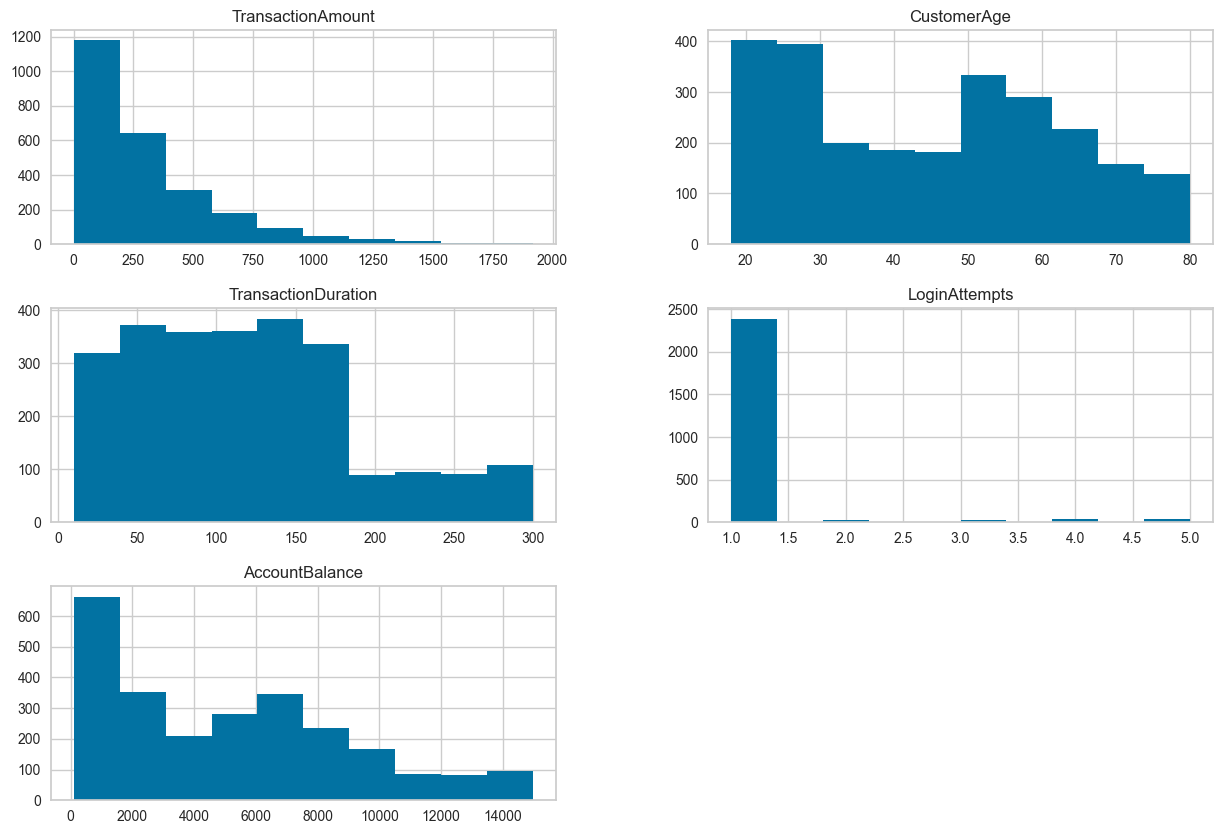

In [718]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(figsize=(15, 10))
plt.show()

Memeriksa hubungan antar variabel

In [719]:
correlation_matrix = df[numeric_features].corr()
correlation_matrix

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


##### Visualisasi Data

In [720]:
categorical_features = df.select_dtypes(include=['object']).columns

categorical_features

Index(['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], dtype='object')

Tipe transaksi yang digunakan

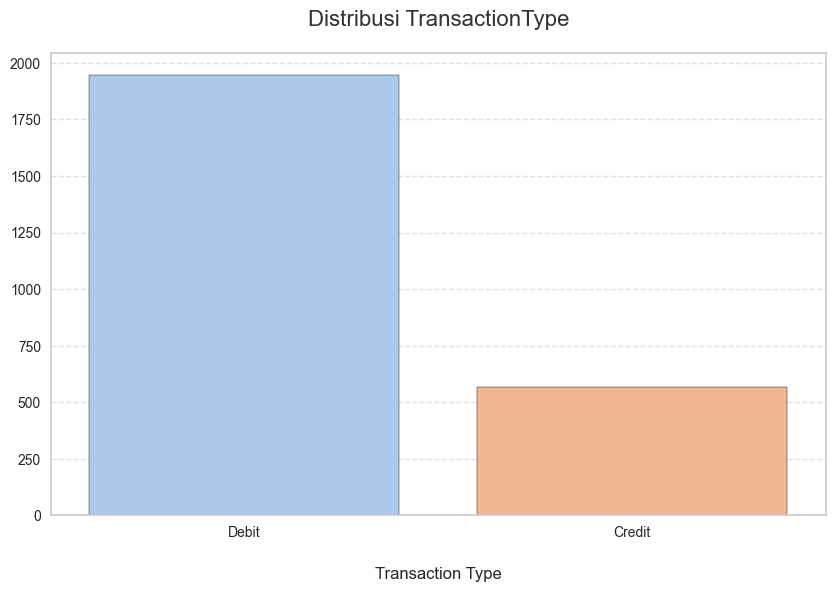

In [721]:
plt.figure(figsize=(10, 6))
transaction_type_counts = df["TransactionType"].value_counts()

sns.barplot(
    x=transaction_type_counts.index,
    y=transaction_type_counts.values,
    hue=transaction_type_counts.index,
    palette="pastel",
    edgecolor="black",
    legend=False
)

plt.title("Distribusi TransactionType", fontsize=16, color="#333333", pad=20)
plt.xlabel("Transaction Type", fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()


Lokasi transaksi terbanyak

C:\Users\Asgarindo\AppData\Local\Temp\ipykernel_6140\2610383234.py:6: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


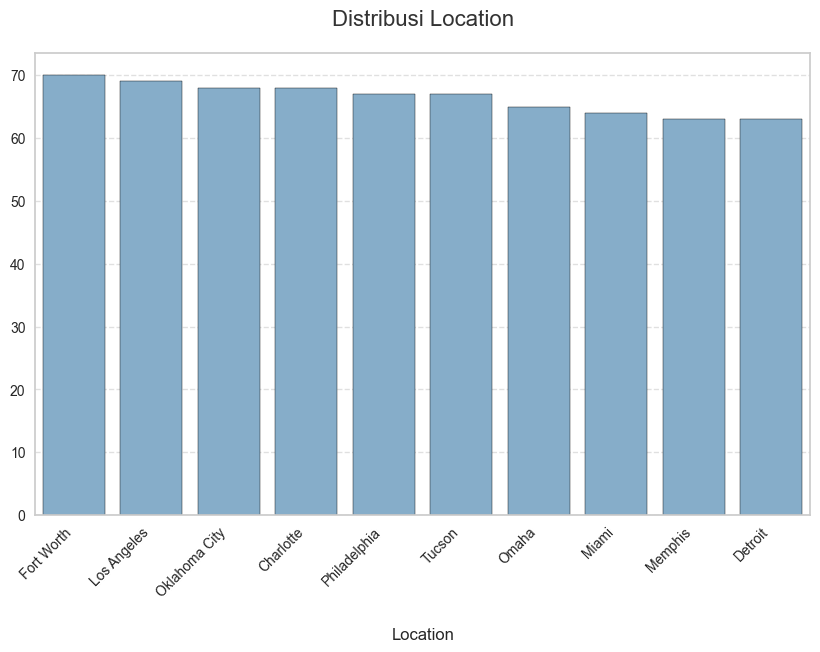

In [722]:
plt.figure(figsize=(10, 6))
location_counts = df["Location"].value_counts().nlargest(10)

colors = ["#7BAFD4"]

sns.barplot(
    x=location_counts.index,
    y=location_counts.values,
    hue=location_counts.index,
    palette=colors,
    edgecolor="black",
    legend=False
)

plt.title("Distribusi Location", fontsize=16, color="#333333", pad=20)
plt.xlabel("Location", fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')

plt.show()


Penggunaan Channel (platform)

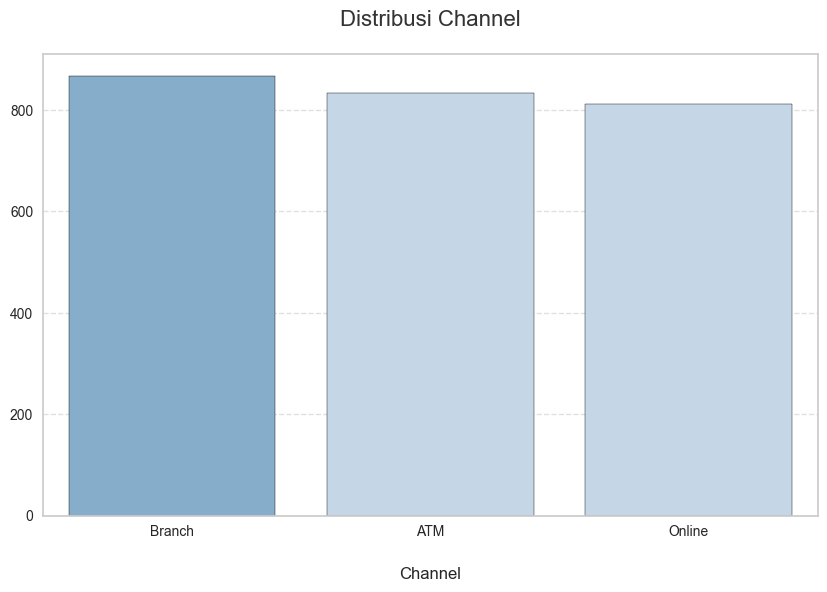

In [723]:
plt.figure(figsize=(10, 6))
channel_counts = df["Channel"].value_counts()
channel_colors = ["#7BAFD4" if i == 0 else "#BFD7ED" for i in range(len(channel_counts))]
sns.barplot(
    x=channel_counts.index,
    y=channel_counts.values,
    hue=channel_counts.index,
    palette=channel_colors,
    edgecolor="black",
    legend=False
)
plt.title("Distribusi Channel", fontsize=16, color="#333333", pad=20)
plt.xlabel("Channel", fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

jenis-jenis pekerjaan pelanggan

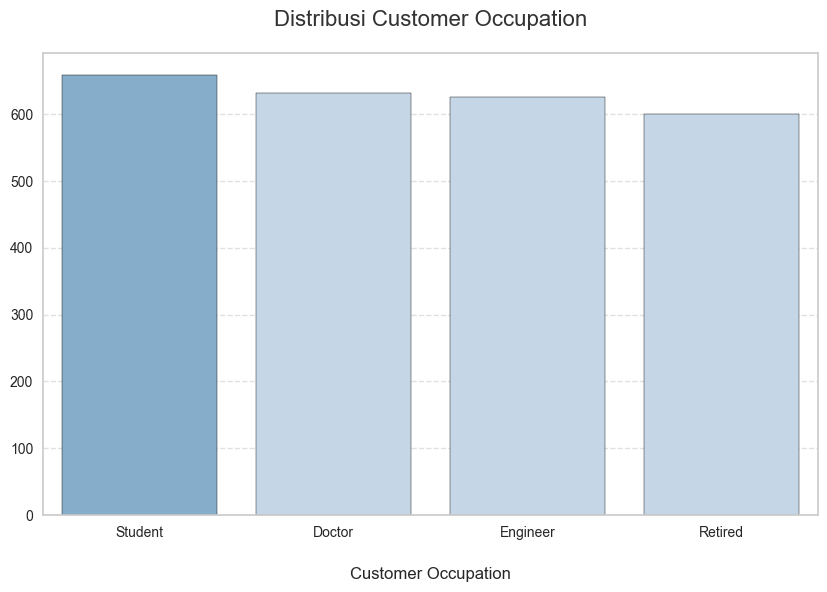

In [724]:
plt.figure(figsize=(10, 6))
occupation_counts = df["CustomerOccupation"].value_counts()
occupation_colors = ["#7BAFD4" if i == 0 else "#BFD7ED" for i in range(len(occupation_counts))]
sns.barplot(
    x=occupation_counts.index,
    y=occupation_counts.values,
    hue=occupation_counts.index,
    palette=occupation_colors,
    edgecolor="black",
    legend=False
)
plt.title("Distribusi Customer Occupation", fontsize=16, color="#333333", pad=20)
plt.xlabel("Customer Occupation", fontsize=12, labelpad=20)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

korelasi antar variabel numerik

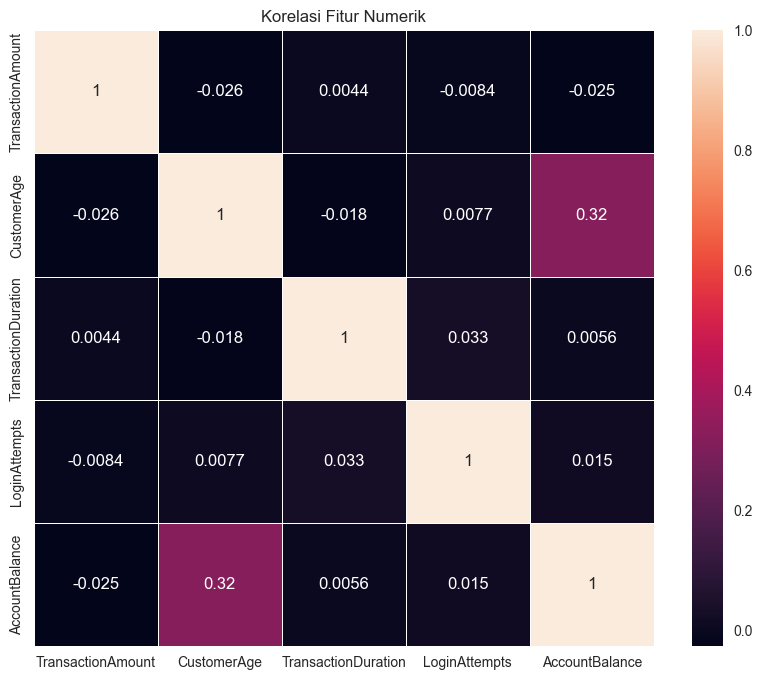

In [725]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

mengecek ulang data yang kosong dan duplikat

In [726]:
df.isna().sum()

TransactionAmount      0
TransactionType        0
Location               0
Channel                0
CustomerAge            0
CustomerOccupation     0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64

In [727]:
df.duplicated().sum()

np.int64(0)

Melakukan normalisasi

In [728]:
minmax_scaler = MinMaxScaler()
scaled_minmax = minmax_scaler.fit_transform(df[numeric_features])
scaled_df_minmax = pd.DataFrame(scaled_minmax, columns=numeric_features)

pengecekan outlier

In [729]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((df < lower_bound) | (df > upper_bound))
    return outliers

outliers = detect_outliers_iqr(scaled_df_minmax)
outliers_data_iqr = scaled_df_minmax[outliers.any(axis=1)] 
print("Data yang terdeteksi sebagai outlier berdasarkan IQR:\n", outliers_data_iqr.shape)

Data yang terdeteksi sebagai outlier berdasarkan IQR:
 (230, 5)


outlier tidak ditangani karena dalam fraud detection bisa menjadi poin data yang memberikan informasi berharga

Encoding data categorical

In [730]:
label_encoders = {} 

for col in categorical_features:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder

df[categorical_features].head()

,TransactionType,Location,Channel,CustomerOccupation
0,1,36,0,0
1,1,15,0,0
2,1,23,2,3
3,1,33,2,3
4,0,1,2,3


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [731]:
X = pd.concat([scaled_df_minmax, df[categorical_features]], axis=1)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

cluster_centers = kmeans.cluster_centers_

distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans_labels], axis=1)
threshold = np.percentile(distances, 95)
X['Potential_Fraud'] = distances > threshold

frauds = X[X['Potential_Fraud']]
non_frauds = X[~X['Potential_Fraud']]

print("Jumlah transaksi penipuan:", len(frauds))
print("Jumlah transaksi non-penipuan:", len(non_frauds))
print("\n Contoh transaksi yang terindikasi sebagai penipuan:")
frauds.head()


Jumlah transaksi penipuan: 126
Jumlah transaksi non-penipuan: 2386

 Contoh transaksi yang terindikasi sebagai penipuan:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud
5,0.047888,0.000000,0.558621,0.00,0.045738,1,28,0,3,True
39,0.174777,0.596774,0.710345,0.00,0.061716,1,28,2,2,True
47,0.265774,0.016129,0.327586,0.00,0.045739,1,28,2,3,True
114,0.170727,0.354839,0.324138,0.00,0.025470,1,14,2,1,True
117,0.029559,0.403226,0.386207,0.25,0.375561,0,28,0,1,True


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

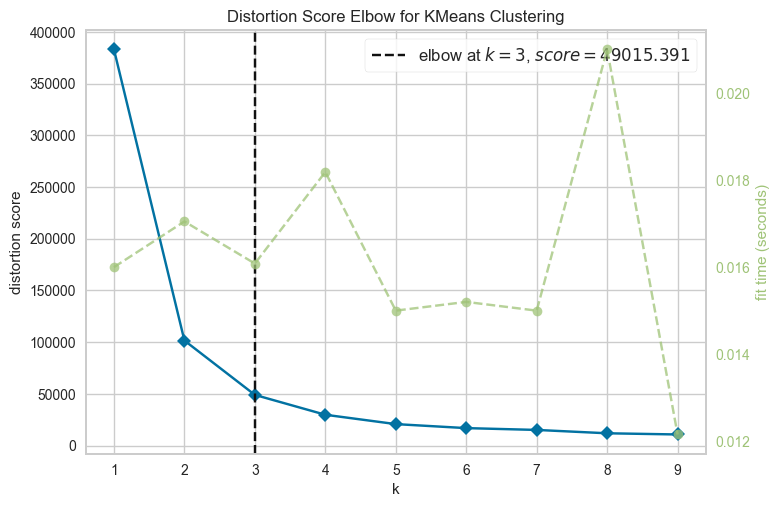

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [732]:
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [733]:
silhouette = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score untuk {n_clusters} cluster: {silhouette}")

Silhouette Score untuk 3 cluster: 0.5415533504867914


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Wrapper Method menggunakan Recursive Feature Elimination (RFE)

In [734]:
X_features = X.drop(columns=["Potential_Fraud"])
y_target = X["Potential_Fraud"]

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
rfe_selector = RFE(estimator=logreg_model, n_features_to_select=5)
X_selected_rfe = rfe_selector.fit_transform(X_features, y_target)

selected_rfe_features = X_features.columns[rfe_selector.support_]
print("\nFitur yang dipilih dengan RFE (Logistic Regression):", list(selected_rfe_features))

X_selected_rf = X_features[selected_rfe_features]


Fitur yang dipilih dengan RFE (Logistic Regression): ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'CustomerOccupation']


In [748]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected_rf)

cluster_centers = kmeans.cluster_centers_

distances = np.linalg.norm(X_selected_rf - kmeans.cluster_centers_[kmeans_labels], axis=1)
threshold = np.percentile(distances, 95)
X_selected_rf.loc[:, 'Potential_Fraud'] = distances > threshold

frauds = X_selected_rf[X_selected_rf['Potential_Fraud']]
non_frauds = X_selected_rf[~X_selected_rf['Potential_Fraud']]

print("Jumlah transaksi penipuan:", len(frauds))
print("Jumlah transaksi non-penipuan:", len(non_frauds))
print("\n Contoh transaksi yang terindikasi sebagai penipuan:")
frauds.head()

Jumlah transaksi penipuan: 126
Jumlah transaksi non-penipuan: 2386

 Contoh transaksi yang terindikasi sebagai penipuan:


,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,CustomerOccupation,Potential_Fraud
41,0.017594,0.322581,0.031034,0.948678,0,True
52,0.044386,0.790323,0.465517,0.995087,0,True
85,0.698298,0.580645,0.068966,0.574926,1,True
116,0.156250,0.806452,0.127586,0.903793,0,True
125,0.111671,0.838710,0.817241,0.742789,0,True


In [736]:
silhouette_after = silhouette_score(X_selected_rf, kmeans_labels)
print(f"Silhouette Score sebelum Feature Selection: {silhouette:.2f}")
print(f"Silhouette Score setelah Feature Selection: {silhouette_after:.2f}")

Silhouette Score sebelum Feature Selection: 0.54
Silhouette Score setelah Feature Selection: 0.54


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [737]:
X_numeric = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance", "Potential_Fraud"]
X_numeric = X[X_numeric]

c:\Users\Asgarindo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


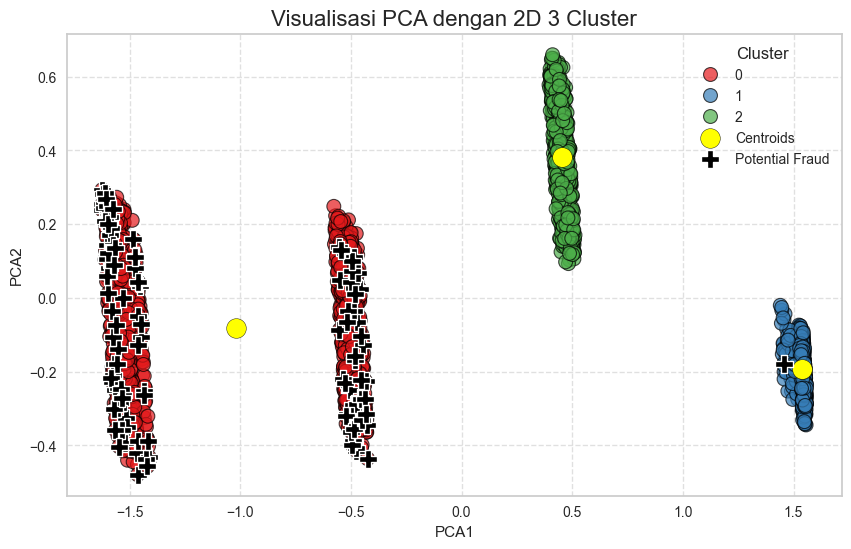

PCA menjelaskan 92.22% dari variasi data


In [738]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_rf.drop('Potential_Fraud', axis=1))

visual_df = X_selected_rf.copy()
visual_df['PCA1'] = X_pca[:, 0]
visual_df['PCA2'] = X_pca[:, 1]
visual_df['Cluster'] = kmeans_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=visual_df,
    palette='Set1', s=100, alpha=0.7, edgecolor='black', legend='full'
)

centroids_pca = pca.transform(cluster_centers)
plt.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], c='yellow', s=200, marker='o',
    label='Centroids', edgecolor='black'
)

sns.scatterplot(
    x='PCA1', y='PCA2', data=visual_df[visual_df['Potential_Fraud']],
    color='black', s=150, marker='P', label='Potential Fraud', legend=False
)

plt.title('Visualisasi PCA dengan 2D 3 Cluster', fontsize=16)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster', loc='upper right')
plt.show()

explained_var = pca.explained_variance_ratio_.sum() * 100
print(f"PCA menjelaskan {explained_var:.2f}% dari variasi data")

c:\Users\Asgarindo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


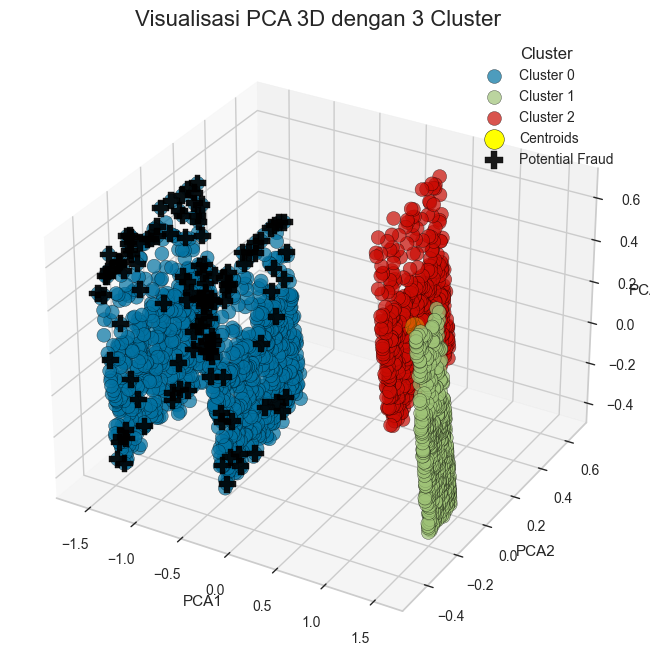

PCA menjelaskan 96.07% dari variasi data


In [739]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_selected_rf.drop('Potential_Fraud', axis=1))

visual_df = X_selected_rf.copy()
visual_df['PCA1'] = X_pca[:, 0]
visual_df['PCA2'] = X_pca[:, 1]
visual_df['PCA3'] = X_pca[:, 2]
visual_df['Cluster'] = kmeans_labels

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    cluster_data = visual_df[visual_df['Cluster'] == cluster]
    ax.scatter(
        cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'],
        label=f'Cluster {cluster}', s=100, alpha=0.7, edgecolor='black'
    )

centroids_pca = pca.transform(cluster_centers)
ax.scatter(
    centroids_pca[:, 0], centroids_pca[:, 1], centroids_pca[:, 2],
    c='yellow', s=200, marker='o', label='Centroids', edgecolor='black'
)

ax.scatter(
    visual_df[visual_df['Potential_Fraud']]['PCA1'],
    visual_df[visual_df['Potential_Fraud']]['PCA2'],
    visual_df[visual_df['Potential_Fraud']]['PCA3'],
    color='black', s=150, marker='P', label='Potential Fraud', alpha=0.9
)

ax.set_title('Visualisasi PCA 3D dengan 3 Cluster', fontsize=16)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.legend(title='Cluster', loc='upper right')
plt.show()

explained_var = pca.explained_variance_ratio_.sum() * 100
print(f"PCA menjelaskan {explained_var:.2f}% dari variasi data")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [740]:
X['Cluster'] = kmeans_labels

In [741]:
label_encoder = LabelEncoder()

for col in categorical_features:
    X[col] = label_encoders[col].inverse_transform(X[col])

X[categorical_features].head()

,TransactionType,Location,Channel,CustomerOccupation
0,Debit,San Diego,ATM,Doctor
1,Debit,Houston,ATM,Doctor
2,Debit,Mesa,Online,Student
3,Debit,Raleigh,Online,Student
4,Credit,Atlanta,Online,Student


In [742]:
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud,Cluster
0,0.007207,0.838710,0.244828,0.0,0.336832,Debit,San Diego,ATM,Doctor,False,0
1,0.195940,0.806452,0.451724,0.0,0.918055,Debit,Houston,ATM,Doctor,False,0
2,0.065680,0.016129,0.158621,0.0,0.068637,Debit,Mesa,Online,Student,False,1
3,0.096016,0.129032,0.051724,0.0,0.569198,Debit,Raleigh,Online,Student,False,1
4,0.006874,0.129032,0.648276,0.0,0.492591,Credit,Atlanta,Online,Student,False,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [743]:
minmax_scaler = MinMaxScaler()

scaled_minmax = minmax_scaler.fit_transform(df[numeric_features])
scaled_df_minmax = pd.DataFrame(scaled_minmax, columns=numeric_features)
X[numeric_features] = minmax_scaler.inverse_transform(scaled_df_minmax)

X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation,Potential_Fraud,Cluster
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,False,0
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,False,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,False,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,False,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,False,1


In [744]:
clustering_df =  X

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [745]:
cluster_summary = clustering_df.groupby('Cluster').describe()

print(cluster_summary.to_string())

        TransactionAmount                                                                  CustomerAge                                                     TransactionDuration                                                         LoginAttempts                                              AccountBalance                                                                          
                    count        mean         std   min     25%      50%      75%      max       count       mean        std   min   25%   50%   75%   max               count        mean        std   min   25%    50%    75%    max         count      mean       std  min  25%  50%  75%  max          count         mean          std      min       25%      50%       75%       max
Cluster                                                                                                                                                                                                                                           

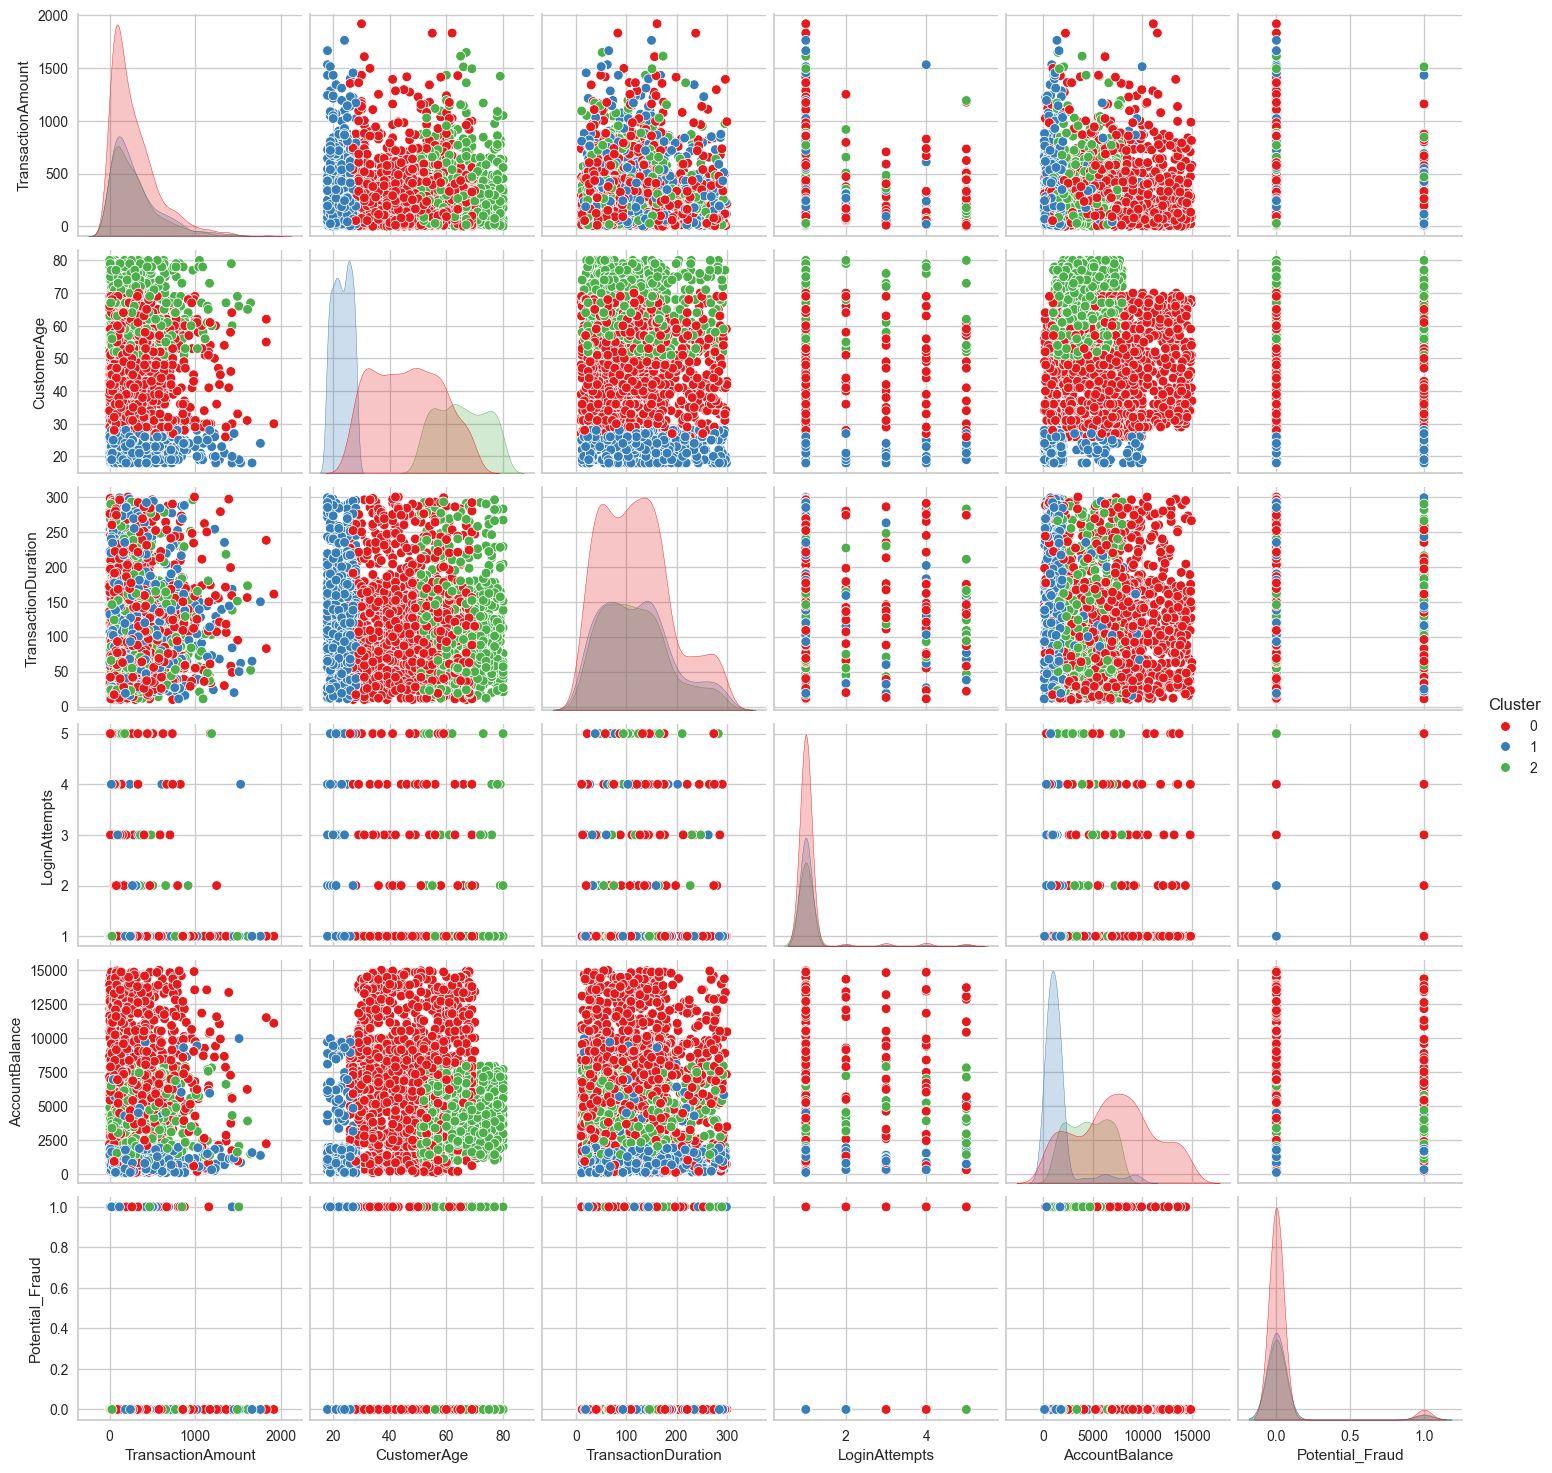

In [746]:
sns.pairplot(clustering_df, hue="Cluster", palette="Set1")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0: 
   - Rata-rata Transaction Amount: 290.88
   - Rata-rata Customer Age: 46.13 tahun (umur 26-70)
   - Rata-rata Transaction Duration: 120.27 detik (Min-Max: 10 - 300 detik)
   - Rata-rata Login Attempts: 1.13 (Min-Max: 1 - 5)
   - Rata-rata Account Balance: 7241.04 (Min-Max: 112.76 - 14977.99)
   - Analisis:
     Cluster ini berisi pelanggan dengan transaksi yang sangat bervariasi, baik dari sisi jumlah maupun durasinya. Mereka umumnya berusia menengah dan memiliki saldo akun yang cukup tinggi. Bisa jadi, pelanggan di cluster ini melakukan transaksi untuk kebutuhan sehari-hari, tapi juga ada yang melakukan pembelian dengan nilai lebih besar, Karena variasi transaksi yang cukup besar, cluster ini mungkin juga berisiko terkait dengan potensi fraud di sekitarnya

2. Cluster 1:
   - Rata-rata Transaction Amount: 313.22
   - Rata-rata Customer Age: 23.07 tahun (umur 18-28)
   - Rata-rata Transaction Duration: 120.65 detik
   - Rata-rata Login Attempts: 1.11
   - Rata-rata Account Balance: 1570.21 (Min-Max: 101.25 - 9963.39)
   - Analisis:
     Cluster ini kebanyakan diisi oleh pelanggan muda dengan saldo akun yang tidak terlalu tinggi dibandingkan Cluster 0. Transaksi mereka cukup bervariasi, tapi saldo akun mereka cenderung lebih rendah. Biasanya, pelanggan di cluster ini lebih sederhana dalam bertransaksi dan durasinya juga tidak terlalu lama

3. Cluster 2:
   - Rata-rata Transaction Amount: 294.53
   - Rata-rata Customer Age: 65.32 tahun (pelanggan lebih tua)
   - Rata-rata Transaction Duration: 117.22 detik
   - Rata-rata Login Attempts: 1.13
   - Rata-rata Account Balance: 4542.16 (Min-Max: 1006.12 - 7996.70)
   - Analisis:
     Cluster ini diisi oleh pelanggan yang lebih tua, dengan saldo akun lebih rendah dibandingkan Cluster 0, tapi masih lebih tinggi dari Cluster 1. Durasi transaksi mereka sedikit lebih cepat.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [747]:
clustering_df.to_csv('clustering.csv', index=False)